#IMPORTING THE DATA FROM FILE FIRST.PYNB

In [ ]:
import pandas as pd
df= pd.read_csv('onehotencodeddata')

In [ ]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

-SHOWS THE FOLLOWING COLUMNS

In [ ]:
df.columns

Index(['Unnamed: 0', 'Latitude', 'Price', 'Size', 'Population', 'PropType_0',
       'PropType_1', 'PropType_2', 'PropType_3', 'PropType_4', 'PropType_5',
       'Bedrooms_Bedrooms: 1', 'Bedrooms_Bedrooms: 1 + Den',
       'Bedrooms_Bedrooms: 2', 'Bedrooms_Bedrooms: 2 + Den',
       'Bedrooms_Bedrooms: 3', 'Bedrooms_Bedrooms: 3 + Den',
       'Bedrooms_Bedrooms: 4', 'Bedrooms_Bedrooms: 4 + Den',
       'Bedrooms_Bedrooms: 5+', 'Bedrooms_Bedrooms: Bachelor/Studio',
       'Bathrooms_Bathrooms: 1', 'Bathrooms_Bathrooms: 1.5',
       'Bathrooms_Bathrooms: 2', 'Bathrooms_Bathrooms: 2.5',
       'Bathrooms_Bathrooms: 3', 'Bathrooms_Bathrooms: 3.5',
       'Bathrooms_Bathrooms: 4', 'Bathrooms_Bathrooms: 4.5',
       'Bathrooms_Bathrooms: 5', 'Bathrooms_Bathrooms: 5.5',
       'Bathrooms_Bathrooms: 6+', 'Hydro_N', 'Hydro_Y', 'Heat_N', 'Heat_Y',
       'Water_N', 'Water_Y'],
      dtype='object')

-SPLITING THE DATASET INTO TEST AND TRAIN TO TEST VARIOUS MODELS.


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
X = df.drop(['Price'], axis=1)
y = df['Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2)

-PERFORMING STANDARD SCALER METHOD.

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler =  StandardScaler()
x_trian = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_train)

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_test shape: (20585, 37)
y_test shape: (5147,)


#NOW, MOVING AHEAD TO PUT LINEAR REGRESSION MODEL.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Split the data into training atesting sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the linear regression model
V = LinearRegression()
V.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = V.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

# Coefficients and intercept
print("Coefficients:", V.coef_)
print("Intercept:", V.intercept_)

Mean Squared Error: 249261.15792005174
R-squared: 0.5780151554403072
Coefficients: [-3.65742718e-03 -4.88857178e+01  3.78505689e-01  1.20589565e-04
 -5.72467290e+01 -2.29768322e+02  3.15609956e+02 -2.12398865e+01
  9.19346428e+01 -9.92896610e+01 -5.01335163e+02 -2.89547617e+02
 -1.87117738e+02  6.68980891e+00  1.13522649e+02  2.74835948e+02
  3.57285290e+02  3.74924134e+02  5.18630751e+02 -6.67888063e+02
 -9.77860111e+02 -8.08586812e+02 -6.23968568e+02 -4.60020488e+02
 -2.97009088e+02 -2.33106100e+02  1.18399075e+01  3.82506576e+02
  2.21914505e+02  9.57293928e+02  1.82699625e+03  3.98624333e+01
 -3.98624333e+01 -2.63846866e+01  2.63846866e+01  3.89153303e+01
 -3.89153303e+01]
Intercept: 4916.193476200344


- USING K FOLD TO PERFORM CROSS VALIDATION.


In [ ]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import mean_squared_error, r2_score
k_folds = 4
kf = KFold(n_splits=k_folds, shuffle=True, random_state=42)
mse_scores = -cross_val_score(V, X_scaled, y, cv=kf, scoring='neg_mean_squared_error')
r2_scores = cross_val_score(V, X_scaled, y, cv=kf, scoring='r2')
print("R^2 scores:", r2_scores)
print("Mean R^2:", r2_scores.mean())
print("Mean MSE:", mse_scores.mean())
print("Standard Deviation of MSE:", mse_scores.std())


R^2 scores: [0.578015   0.57908441 0.58467865 0.59832437 0.55077137]
Mean R^2: 0.5781747604702303
Mean MSE: 247685.56324892538
Standard Deviation of MSE: 14416.073630249872


# USING RANDOM FOREST REGRESSOR MODEL.

In [ ]:
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest Regression model
rf = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model on the training data
rf.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = rf.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

# Coefficients and intercept
print("Feature Importances:", rf.feature_importances_)




Mean Squared Error: 192688.1573230814
R-squared: 0.6737900008369773
Feature Importances: [1.39733769e-01 1.31642371e-01 3.69425040e-02 5.42842723e-02
 7.82897195e-03 1.30463642e-02 2.91929914e-02 2.00022330e-03
 3.06946613e-02 5.49821625e-03 1.80226499e-02 4.38676723e-03
 1.87948322e-02 8.88407989e-03 3.42685631e-02 7.09569408e-03
 9.36350139e-03 2.28157436e-03 1.28043771e-02 6.76862739e-03
 3.51494938e-01 1.15810904e-02 9.88551560e-03 3.54944874e-03
 6.01131806e-03 2.33143996e-03 3.72466601e-03 1.36842015e-03
 2.89381841e-03 9.42439944e-05 3.16262480e-04 6.57250625e-03
 6.54916900e-03 4.82884096e-03 4.80539531e-03 5.16220260e-03
 5.29571248e-03]


- NOW, DOING CROSS VALIDATION AS DONE ABOVE.

In [ ]:

# Define the number of folds for cross-validation
k_folds = 5  # You can adjust this number as needed
# Create a KFold object
kf = KFold(n_splits=k_folds, shuffle=True, random_state=42)
# Perform cross-validation and calculate MSE scores
mse_scores = -cross_val_score(rf, X, y, cv=kf, scoring='neg_mean_squared_error')
# Perform cross-validation and calculate R^2 scores
r2_scores = cross_val_score(rf, X, y, cv=kf, scoring='r2')
print("R^2 scores:", r2_scores)
print("Mean R^2:", r2_scores.mean())
print("Mean MSE:", mse_scores.mean())
print("Standard Deviation of MSE:", mse_scores.std())

R^2 scores: [0.67229188 0.66516048 0.69168194 0.70556168 0.67658208]
Mean R^2: 0.6822556125087088
Mean MSE: 186565.40386052057
Standard Deviation of MSE: 11703.628457187175


# APPLYING KNN REGRESSOR MODEL.

In [ ]:
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the KNN Regression model
knn = KNeighborsRegressor(n_neighbors=5)

# Train the model on the training data
knn.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = knn.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)


Mean Squared Error: 415077.4923934136
R-squared: 0.2972976111904224


In [ ]:
k_folds = 2  # You can adjust this number as needed
# Create a KFold object
kf = KFold(n_splits=k_folds, shuffle=True, random_state=42)
# Perform cross-validation and calculate MSE scores
mse_scores = -cross_val_score(knn, X, y, cv=kf, scoring='neg_mean_squared_error')
# Perform cross-validation and calculate R^2 scores
r2_scores = cross_val_score(knn, X, y, cv=kf, scoring='r2')
print("R^2 scores:", r2_scores)
print("Mean R^2:", r2_scores.mean())
print("Mean MSE:", mse_scores.mean())
print("Standard Deviation of MSE:", mse_scores.std())

R^2 scores: [0.29736669 0.30851489 0.30580423 0.33285452 0.31494878]
Mean R^2: 0.311897819119078
Mean MSE: 403842.45923156606
Standard Deviation of MSE: 14805.41969479944


#DECISION TREE REGRESSOR MODEL.

In [ ]:
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Decision Tree Regression model
dt = DecisionTreeRegressor(random_state=42)

# Train the model on the training data
dt.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = dt.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)





Mean Squared Error: 373247.2225476782
R-squared: 0.36811385896057947


- CROSS VALIDATION.

In [ ]:
# Define the number of folds for cross-validation
k_folds = 8  # You can adjust this number as needed
# Create a KFold object
kf = KFold(n_splits=k_folds, shuffle=True, random_state=42)
# Perform cross-validation and calculate MSE scores
mse_scores = -cross_val_score(dt, X, y, cv=kf, scoring='neg_mean_squared_error')
# Perform cross-validation and calculate R^2 scores
r2_scores = cross_val_score(dt, X, y, cv=kf, scoring='r2')
print("R^2 scores:", r2_scores)
print("Mean R^2:", r2_scores.mean())
print("Mean MSE:", mse_scores.mean())
print("Standard Deviation of MSE:", mse_scores.std())

R^2 scores: [0.36811386 0.37501511 0.46330017 0.44178475 0.43910207]
Mean R^2: 0.4174631934278324
Mean MSE: 341842.05393620516
Standard Deviation of MSE: 24555.821770323855


# USING GRADIENT BOOST REGRESSOR

In [ ]:
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Gradient Boosting Regression model
gb = GradientBoostingRegressor(n_estimators=100, random_state=42)

# Train the model on the training data
gb.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = gb.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)


Mean Squared Error: 210897.39375995478
R-squared: 0.6429628078981189


- APPLYING K FOLDS AGAIN, FOR CROSS VALIDATION.


In [ ]:
# Define the number of folds for cross-validation
k_folds = 9  # You can adjust this number as needed
# Create a KFold object
kf = KFold(n_splits=k_folds, shuffle=True, random_state=42)
# Perform cross-validation and calculate MSE scores
mse_scores = -cross_val_score(gb, X, y, cv=kf, scoring='neg_mean_squared_error')
# Perform cross-validation and calculate R^2 scores
r2_scores = cross_val_score(gb, X, y, cv=kf, scoring='r2')
print("R^2 scores:", r2_scores)
print("Mean R^2:", r2_scores.mean())
print("Mean MSE:", mse_scores.mean())
print("Standard Deviation of MSE:", mse_scores.std())


R^2 scores: [0.64296281 0.64120352 0.65434746 0.66381564 0.62418813]
Mean R^2: 0.6453035103803161
Mean MSE: 208269.1828122377
Standard Deviation of MSE: 12213.002089998368


Feature Importances:
Feature 1: Unnamed: 0: 0.29582945755481177
Feature 2: Latitude: 0.26785732307756815
Feature 3: Size: 0.08102876613103142
Feature 4: Population: 0.23085790977947926
Feature 5: PropType_0: 0.032718149940539676
Feature 6: PropType_1: 0.04008429441443091
Feature 7: PropType_2: 0.07440060081598922
Feature 8: PropType_3: 0.0022711150536545823
Feature 9: PropType_4: 0.1455632937581351
Feature 10: PropType_5: 0.010261275570410445
Feature 11: Bedrooms_Bedrooms: 1: 0.19941684104264001
Feature 12: Bedrooms_Bedrooms: 1 + Den: 0.00840690189933574
Feature 13: Bedrooms_Bedrooms: 2: 0.07557125016979574
Feature 14: Bedrooms_Bedrooms: 2 + Den: 0.016465502406319932
Feature 15: Bedrooms_Bedrooms: 3: 0.1598221539550959
Feature 16: Bedrooms_Bedrooms: 3 + Den: 0.013982215241038608
Feature 17: Bedrooms_Bedrooms: 4: 0.027577035876814926
Feature 18: Bedrooms_Bedrooms: 4 + Den: 0.002809517671859163
Feature 19: Bedrooms_Bedrooms: 5+: 0.02575315141030927
Feature 20: Bedrooms_Bedrooms: Bachelor

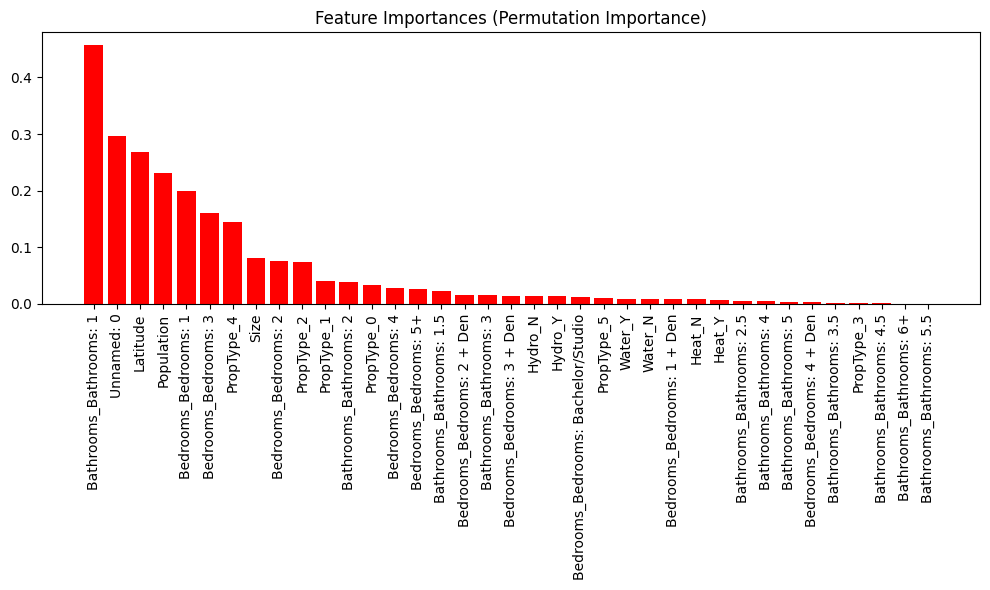

In [ ]:
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt
import pandas as pd

# Convert X_train to DataFrame if it's not already
X_train_df = pd.DataFrame(X_train)

# Calculate feature importances using permutation importance
result = permutation_importance(rf, X_train_df, y_train, n_repeats=10, random_state=42)

# Print the feature importances
print("Feature Importances:")
for i, (name, importance) in enumerate(zip(X_train_df.columns, result.importances_mean)):
    print(f"Feature {i+1}: {name}: {importance}")

# Sort the features by importance
importances = result.importances_mean
feature_names = X_train_df.columns
feature_importances = list(zip(feature_names, importances))
feature_importances = sorted(feature_importances, key=lambda x: x[1], reverse=True)

# Extract feature names and importances
feature_names, importances = zip(*feature_importances)

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.title("Feature Importances (Permutation Importance)")
plt.bar(range(len(feature_names)), importances, color='r', align='center')
plt.xticks(range(len(feature_names)), feature_names, rotation=90)
plt.tight_layout()
plt.show()


Feature Importances:
Feature 1: Unnamed: 0: 0.09617973140712036
Feature 2: Latitude: 0.1500194229288087
Feature 3: Size: 0.01608759391971267
Feature 4: Population: 0.028810036770606628
Feature 5: PropType_0: 0.005448417016931573
Feature 6: PropType_1: 0.04583707495721369
Feature 7: PropType_2: 0.01989577711684465
Feature 8: PropType_3: 4.174626126896008e-05
Feature 9: PropType_4: 0.03212248398935963
Feature 10: PropType_5: 0.00016987380489434932
Feature 11: Bedrooms_Bedrooms: 1: 0.1540448172570151
Feature 12: Bedrooms_Bedrooms: 1 + Den: 0.003242717151257146
Feature 13: Bedrooms_Bedrooms: 2: 0.001438914173945649
Feature 14: Bedrooms_Bedrooms: 2 + Den: 0.00205281418649621
Feature 15: Bedrooms_Bedrooms: 3: 0.019330931922744432
Feature 16: Bedrooms_Bedrooms: 3 + Den: 0.005926000843714807
Feature 17: Bedrooms_Bedrooms: 4: 0.014782468084030909
Feature 18: Bedrooms_Bedrooms: 4 + Den: 0.0030081490618756755
Feature 19: Bedrooms_Bedrooms: 5+: 0.01809423548016532
Feature 20: Bedrooms_Bedrooms: Ba

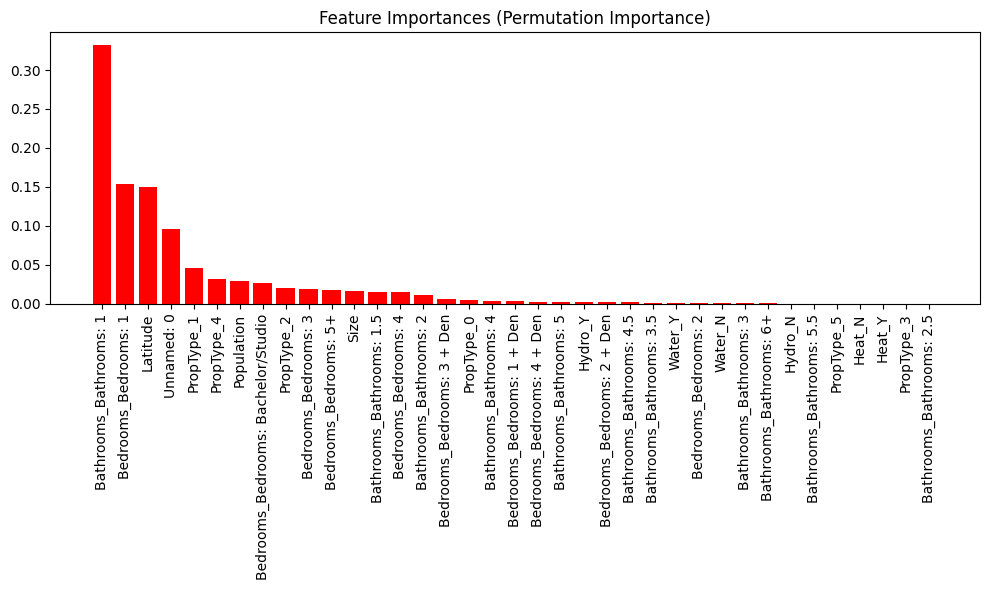

In [ ]:
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt
import pandas as pd

# Convert X_train to DataFrame if it's not already
X_train_df = pd.DataFrame(X_train)

# Calculate feature importances using permutation importance
result = permutation_importance(gb, X_train_df, y_train, n_repeats=10, random_state=42)

# Print the feature importances
print("Feature Importances:")
for i, (name, importance) in enumerate(zip(X_train_df.columns, result.importances_mean)):
    print(f"Feature {i+1}: {name}: {importance}")

# Sort the features by importance
importances = result.importances_mean
feature_names = X_train_df.columns
feature_importances = list(zip(feature_names, importances))
feature_importances = sorted(feature_importances, key=lambda x: x[1], reverse=True)

# Extract feature names and importances
feature_names, importances = zip(*feature_importances)

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.title("Feature Importances (Permutation Importance)")
plt.bar(range(len(feature_names)), importances, color='r', align='center')
plt.xticks(range(len(feature_names)), feature_names, rotation=90)
plt.tight_layout()
plt.show()


Feature Importances:
Feature 1: Unnamed: 0: 0.002411069471378502
Feature 2: Latitude: 0.0077258653747600105
Feature 3: Size: 0.005616301302078408
Feature 4: Population: 0.06714159402138715
Feature 5: PropType_0: 0.002864914476205571
Feature 6: PropType_1: 0.022110114187958985
Feature 7: PropType_2: 0.03908893249237651
Feature 8: PropType_3: 4.4786502563409766e-05
Feature 9: PropType_4: 0.005007785113010377
Feature 10: PropType_5: 0.002693283497722154
Feature 11: Bedrooms_Bedrooms: 1: 0.16301691969426554
Feature 12: Bedrooms_Bedrooms: 1 + Den: 0.015477166706534606
Feature 13: Bedrooms_Bedrooms: 2: 0.024347246621202523
Feature 14: Bedrooms_Bedrooms: 2 + Den: -2.609293788580214e-06
Feature 15: Bedrooms_Bedrooms: 3: 0.007094152830308365
Feature 16: Bedrooms_Bedrooms: 3 + Den: 0.007716803212106005
Feature 17: Bedrooms_Bedrooms: 4: 0.02679319035467671
Feature 18: Bedrooms_Bedrooms: 4 + Den: 0.005247780812024361
Feature 19: Bedrooms_Bedrooms: 5+: 0.01593874701725213
Feature 20: Bedrooms_Bedro

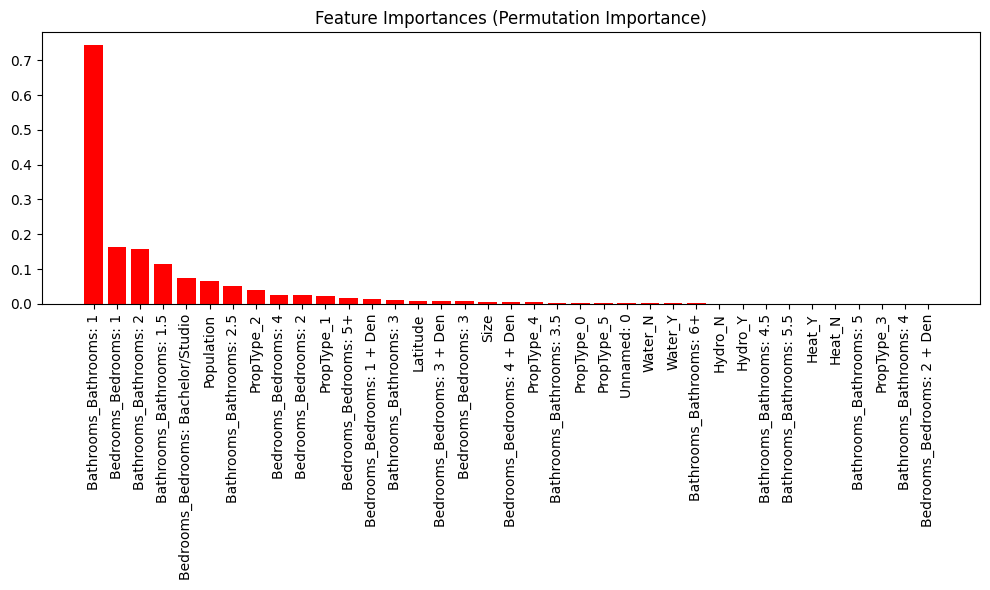

In [ ]:
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression

# Convert X_train to DataFrame if it's not already
X_train_df = pd.DataFrame(X_train)

# Initialize the linear regression model
lr = LinearRegression()

# Fit the model
lr.fit(X_train_df, y_train)

# Calculate feature importances using permutation importance
result = permutation_importance(lr, X_train_df, y_train, n_repeats=10, random_state=42)

# Print the feature importances
print("Feature Importances:")
for i, (name, importance) in enumerate(zip(X_train_df.columns, result.importances_mean)):
    print(f"Feature {i+1}: {name}: {importance}")

# Sort the features by importance
importances = result.importances_mean
feature_names = X_train_df.columns
feature_importances = list(zip(feature_names, importances))
feature_importances = sorted(feature_importances, key=lambda x: x[1], reverse=True)

# Extract feature names and importances
feature_names, importances = zip(*feature_importances)

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.title("Feature Importances (Permutation Importance)")
plt.bar(range(len(feature_names)), importances, color='r', align='center')
plt.xticks(range(len(feature_names)), feature_names, rotation=90)
plt.tight_layout()
plt.show()


Feature Importances:
Feature 1: Unnamed: 0: 0.8501507728115192
Feature 2: Latitude: 0.6661742905782287
Feature 3: Size: 0.19151034163362007
Feature 4: Population: 0.5654447910724205
Feature 5: PropType_0: 0.1476697499083781
Feature 6: PropType_1: 0.09881768666895362
Feature 7: PropType_2: 0.10808629123884206
Feature 8: PropType_3: 0.00819396832636391
Feature 9: PropType_4: 0.24309807614962137
Feature 10: PropType_5: 0.014468035761529208
Feature 11: Bedrooms_Bedrooms: 1: 0.44089415596742026
Feature 12: Bedrooms_Bedrooms: 1 + Den: 0.03940916813673907
Feature 13: Bedrooms_Bedrooms: 2: 0.21928781913334489
Feature 14: Bedrooms_Bedrooms: 2 + Den: 0.03664449243942436
Feature 15: Bedrooms_Bedrooms: 3: 0.2809258954269656
Feature 16: Bedrooms_Bedrooms: 3 + Den: 0.041993848728370864
Feature 17: Bedrooms_Bedrooms: 4: 0.16985673647544708
Feature 18: Bedrooms_Bedrooms: 4 + Den: 0.031703216448777084
Feature 19: Bedrooms_Bedrooms: 5+: 0.0797686316328689
Feature 20: Bedrooms_Bedrooms: Bachelor/Studio: 

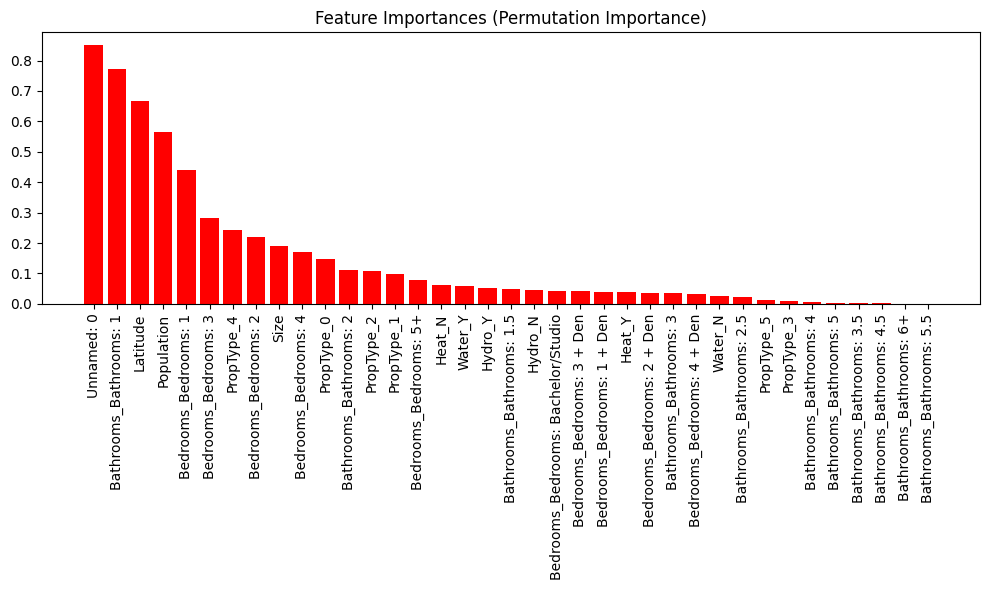

In [ ]:
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.tree import DecisionTreeRegressor

# Convert X_train to DataFrame if it's not already
X_train_df = pd.DataFrame(X_train)

# Initialize the decision tree regression model
dt = DecisionTreeRegressor(random_state=42)

# Fit the model
dt.fit(X_train_df, y_train)

# Calculate feature importances using permutation importance
result = permutation_importance(dt, X_train_df, y_train, n_repeats=10, random_state=42)

# Print the feature importances
print("Feature Importances:")
for i, (name, importance) in enumerate(zip(X_train_df.columns, result.importances_mean)):
    print(f"Feature {i+1}: {name}: {importance}")

# Sort the features by importance
importances = result.importances_mean
feature_names = X_train_df.columns
feature_importances = list(zip(feature_names, importances))
feature_importances = sorted(feature_importances, key=lambda x: x[1], reverse=True)

# Extract feature names and importances
feature_names, importances = zip(*feature_importances)

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.title("Feature Importances (Permutation Importance)")
plt.bar(range(len(feature_names)), importances, color='r', align='center')
plt.xticks(range(len(feature_names)), feature_names, rotation=90)
plt.tight_layout()
plt.show()


Feature Importances:
Feature 1: Unnamed: 0: 1.0441415439672384
Feature 2: Latitude: 5.288196133171885e-05
Feature 3: Size: 0.36895137155839
Feature 4: Population: 1.1783627212830017
Feature 5: PropType_0: 0.00035091317916585707
Feature 6: PropType_1: 0.00022330748524881371
Feature 7: PropType_2: 5.78526929616241e-05
Feature 8: PropType_3: -1.2634670747924127e-05
Feature 9: PropType_4: 0.0008826530639216013
Feature 10: PropType_5: 0.0001924177101925273
Feature 11: Bedrooms_Bedrooms: 1: 0.0009114329920391628
Feature 12: Bedrooms_Bedrooms: 1 + Den: 5.636354874948291e-05
Feature 13: Bedrooms_Bedrooms: 2: 0.00011752443103933974
Feature 14: Bedrooms_Bedrooms: 2 + Den: 5.322810265249167e-05
Feature 15: Bedrooms_Bedrooms: 3: 0.00017551158921172983
Feature 16: Bedrooms_Bedrooms: 3 + Den: 4.91426702964759e-05
Feature 17: Bedrooms_Bedrooms: 4: 0.0003226314156747678
Feature 18: Bedrooms_Bedrooms: 4 + Den: 1.3170022959840822e-05
Feature 19: Bedrooms_Bedrooms: 5+: 6.108476016698505e-05
Feature 20: B

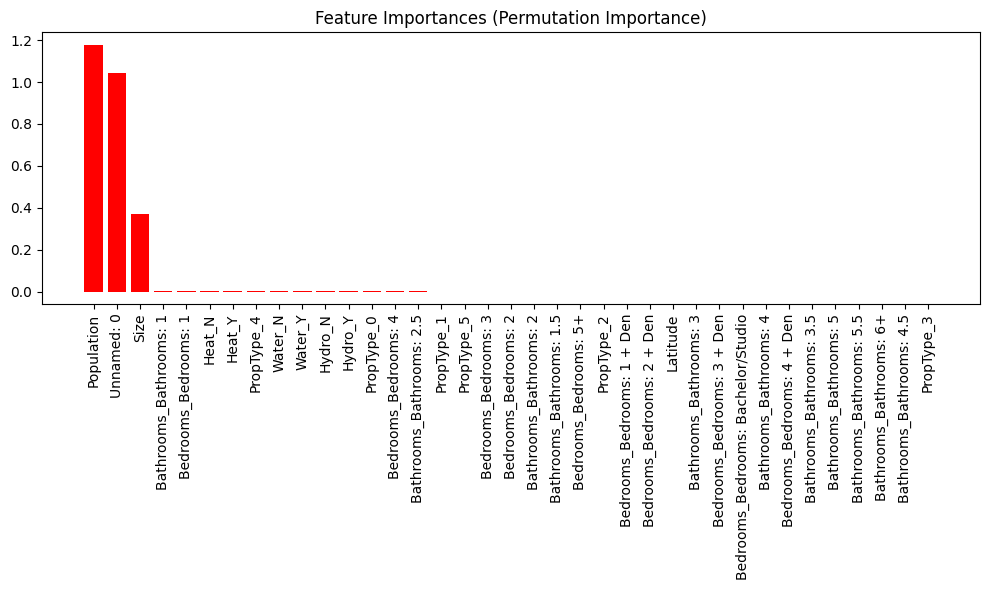

In [ ]:
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.neighbors import KNeighborsRegressor

# Convert X_train to DataFrame if it's not already
X_train_df = pd.DataFrame(X_train)

# Initialize the KNN regression model
knn = KNeighborsRegressor()

# Fit the model
knn.fit(X_train_df, y_train)

# Calculate feature importances using permutation importance
result = permutation_importance(knn, X_train_df, y_train, n_repeats=10, random_state=42)

# Print the feature importances
print("Feature Importances:")
for i, (name, importance) in enumerate(zip(X_train_df.columns, result.importances_mean)):
    print(f"Feature {i+1}: {name}: {importance}")

# Sort the features by importance
importances = result.importances_mean
feature_names = X_train_df.columns
feature_importances = list(zip(feature_names, importances))
feature_importances = sorted(feature_importances, key=lambda x: x[1], reverse=True)

# Extract feature names and importances
feature_names, importances = zip(*feature_importances)

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.title("Feature Importances (Permutation Importance)")
plt.bar(range(len(feature_names)), importances, color='r', align='center')
plt.xticks(range(len(feature_names)), feature_names, rotation=90)
plt.tight_layout()
plt.show()
